# How to handle categroical missing value

# Frequent Category Imputation

In [1]:
df = pd.read_csv('D:\\ML Project\\train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [2]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [6]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# compute the frequency with every feature

In [7]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

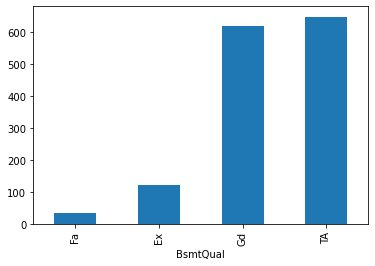

In [8]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

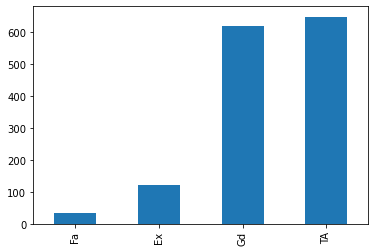

In [9]:
df['BsmtQual'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

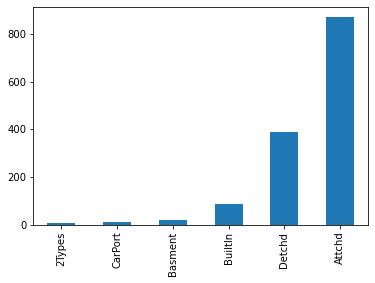

In [10]:
df['GarageType'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

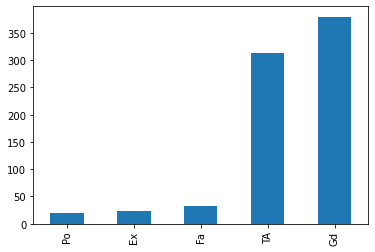

In [11]:
df['FireplaceQu'].value_counts().sort_values().plot.bar()

In [12]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [13]:
df['GarageType'].mode()[0]

'Attchd'

In [14]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [15]:
df['BsmtQual'].mode()[0]

'TA'

In [16]:
### replacing function
def impute_nan(df,vraiable):
    most_frequent_category=df[vraiable].value_counts().index[0]
    df[vraiable].fillna(most_frequent_category,inplace=True)

In [17]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# Advantages
Faster way to implement
# Disadvantages
Since we are using the more frequent labels,it may use them in over represented way. If there are many nan's
it distorts the relation of the most frequent labels

# Adding a vriable to capture NAN

In [20]:
df = pd.read_csv('D:\\ML Project\\train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [22]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [23]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [24]:
frequent=df['BsmtQual'].mode()[0]
frequent

'TA'

In [25]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [27]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_var      0
dtype: int64

In [28]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

<IPython.core.display.Javascript object>

In [29]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Suppose if you have more frequent categories, we just replace nan with a new category

In [30]:
df = pd.read_csv('D:\\ML Project\\train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
def impute_na(d,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),"Missing",df[variable])

In [33]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_na(df,feature)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [35]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
